In [1]:
from markovsoccer.team_model import TeamModel
from markovsoccer.features import SideUsage, SideUsageShot, InwardsOutwardsPreference

In [2]:
model_path = "../models/Arsenal.prism"
team_model = TeamModel.read_from(model_path)

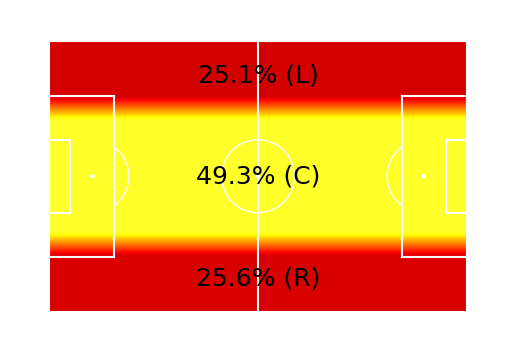

In [3]:
SideUsage.visualize(team_model)

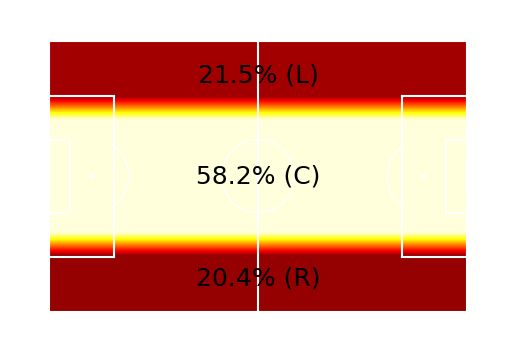

In [4]:
SideUsageShot.visualize(team_model)

In [5]:
InwardsOutwardsPreference.calculate(team_model)

{'inside': 0.42, 'outside': 0.135}

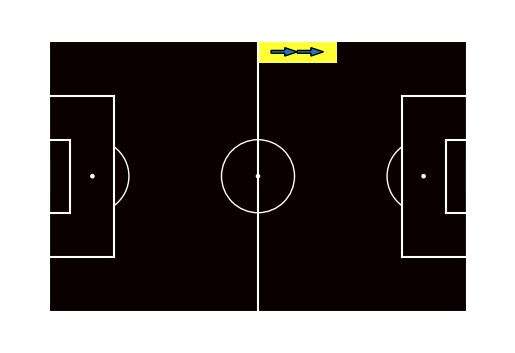

In [6]:
InwardsOutwardsPreference.visualize_most_likely_subsequences(team_model, 1)